In [ ]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.filters import threshold_otsu
from skimage import data
from skimage.exposure import histogram
from skimage.color import label2rgb
import matplotlib.patches as mpatches
from skimage.measure import label, regionprops
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from skimage.morphology import closing, erosion
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage.exposure import histogram

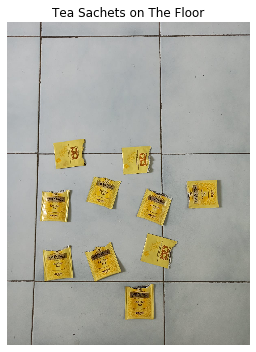

In [122]:
## Viewing the image
image = imread("./images/tea_sachets.jpeg")
plt.figure(figsize=(10,5))
plt.imshow(image)
plt.axis('off')
plt.title("Tea Sachets on The Floor")
plt.tight_layout();
plt.show();

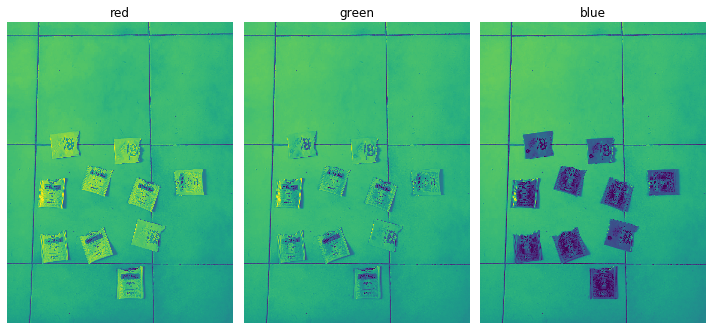

In [17]:
## Viewing the different channels
image_red = image[:,:,0]
image_green = image[:,:,1]
image_blue = image[:,:,2]
fig,axes = plt.subplots(1,3,figsize=(10,5))
axes[0].imshow(image_red);
axes[0].set_title("red");
axes[1].imshow(image_green);
axes[1].set_title("green");
axes[2].imshow(image_blue);
axes[2].set_title("blue");
for a in axes:
    a.axis('off')
plt.tight_layout();
plt.show();

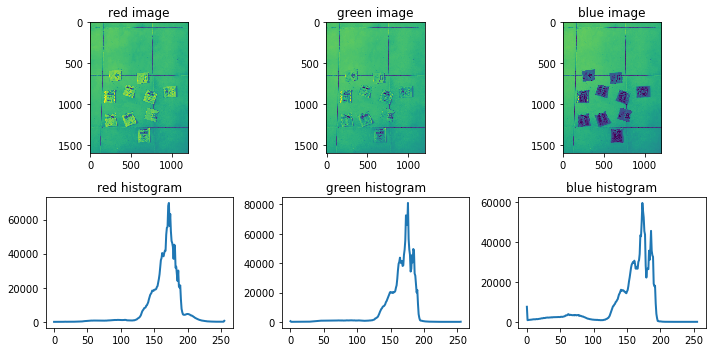

In [22]:
## Viewing histograms of each channel
red_histogram,red_centers = histogram(image_red)
green_histogram,green_centers = histogram(image_green)
blue_histogram,blue_centers = histogram(image_blue)
fig,axes = plt.subplots(2,3,figsize=(10,5))
axes[0,0].set_title("red image");
axes[0,0].imshow(image_red);
axes[1,0].set_title("red histogram");
axes[1,0].plot(red_centers,red_histogram,lw=2);

axes[0,1].set_title("green image");
axes[0,1].imshow(image_green);
axes[1,1].set_title("green histogram");
axes[1,1].plot(green_centers,green_histogram,lw=2);

axes[0,2].set_title("blue image");
axes[0,2].imshow(image_blue);
axes[1,2].set_title("blue histogram");
axes[1,2].plot(blue_centers,blue_histogram,lw=2);

plt.tight_layout();
plt.show();

110


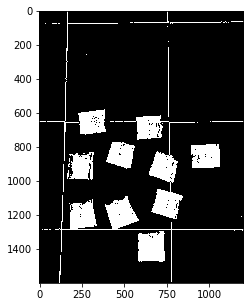

In [121]:
## Why the Blue Channel
## consider all pixels in the blue channel with an intensity less than 10
image_blue = imread("./images/tea_sachets.jpeg")[:,:,2]
gray = skimage.color.rgb2gray(image_blue)
thresh = threshold_otsu(gray)
print(thresh)
thresh = 110
gray[gray < thresh] = 1
gray[gray >= thresh] = 0
plt.figure(figsize=(10,5))
plt.imshow(gray,cmap='gray')
plt.show()

In [ ]:
## Viewing Pixels above and below the threshold, and why the threshold matters.

In [ ]:
## How closing works on a simple black and white image

In [ ]:
## How erosion works on a simple black and white image
## why did we set the sachets to white and the background to black ?
## what would we do if it was the other way around?
## 

otsu threshold:110


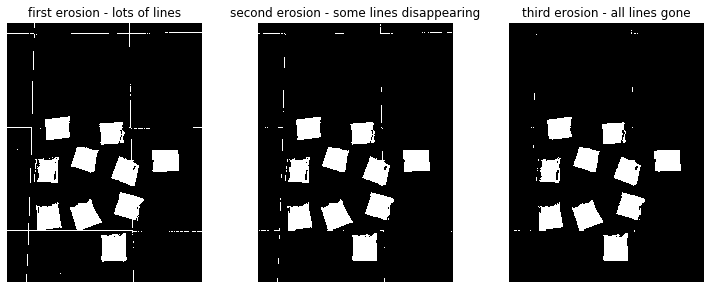

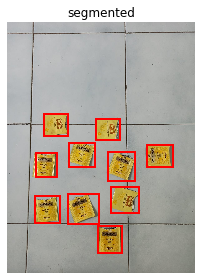

In [123]:
## THE FINAL CODE
## PROGRAM BEGINS HERE.
## FOR A VIDEO EXPLANATION OF THIS NOTEBOOK, VISIT OUR YOUTUBE CHANNEL:
## https://www.youtube.com/

## START
## -----

## read the image
image = imread("./images/tea_sachets.jpeg");

## keep only the blue channel -> it has the maximum contrast, based on the color
## of the items we want to detect
img = image[:,:,2]

## convert the image to grayscale
img = skimage.color.rgb2gray(img);

## compute a simple otsu threshold
thresh = threshold_otsu(img);

print("otsu threshold:" + str(thresh))
## anything below the threshold - set to 1 (this sets all the packets, and the 
## the lines in the floor tiles to 1)
img[img < thresh] = 1
img[img >= thresh] = 0


## perform a closing step.
img = closing(img,square(3))

## perform 3 consecutive erosions, this helps to delineate the packets which are touching 
## the flooring lines.
e1 = erosion(img)
e2 = erosion(e1)
e3 = erosion(e2)

fig,axes = plt.subplots(1,3,figsize=(10,5))
axes[0].imshow(e1,cmap="gray");
axes[0].set_title("first erosion - lots of lines");
axes[1].imshow(e2,cmap="gray");
axes[1].set_title("second erosion - some lines disappearing");
axes[2].imshow(e3,cmap="gray");
axes[2].set_title("third erosion - all lines gone");
for a in axes:
    a.axis('off')
plt.tight_layout();
plt.show();


## call label on the resulting image.
labelled = label(e3)

## show the labels with rectangles, overlay on the original image, filtering rectangles that
## are greater than 1000 pixels, this removes one or two noisy features.
image_label_overlay = label2rgb(labelled, image=image, bg_label=0)
fig, ax = plt.subplots()
ax.imshow(image)

for region in regionprops(labelled):
    if region.area >= 1000:
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                          fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.title("segmented")
plt.tight_layout()
plt.show()